Sistem rekomendasi content based filtering dengan model klasifikasi random forest
- Teknik label encoding, 
- evaluasi Confussion matrix. 

Inputnya: 
- Usia
- Status Pernikahan
- Jenis Kelamin
- Jumlah Anak
- Jenis Pekerjaan
- Pendapatan/Bulan
- Fasilitas Yang Diinginkan
- Preferensi lingkungan

Output: 
- Nama Perumahan
- Jenis Rumah
- Tipe Rumah

# Import Dataset

In [1]:
import pandas as pd

In [2]:
# Import the data
df = pd.read_csv("../data/raw/Dataset_Konsumen.csv")

In [3]:
df.head()

,Timestamp,Nama Samaran,Usia,Jenis Kelamin,Status Pernikahan,Jumlah Anak,Jenis Pekerjaan,Pendapatan/Bulan,Nama Perumahan,Jenis Rumah,Tipe Rumah,Apakah ada fasilitas yang membuat Bapak/Ibu tertarik dengan rumah ini?,Apakah Bapak/Ibu memiliki preferensi tertentu terkait dengan lingkungan sekitar rumah?
0,4/18/2024 2:13:19,Ihsan Riandi,32,Laki-laki,Lajang,0,Karyawan,Rp. 2.000.000 - Rp. 5.000.000,Bukit Cibadak Asri,Subsidi,30/60,"CCTV 24 Jam & Security, One Gate System, Jalan...","View Pegunungan, Suasana Sejuk Dan Asri, Dekat..."
1,4/18/2024 2:14:06,Boayy,36,Laki-laki,Sudah Menikah,2,Wiraswasta,Rp. 5.000.000 - Rp. 10.000.000,Bukit Cibadak Asri,Subsidi,30/60,CCTV 24 Jam & Security,View Pegunungan
2,4/18/2024 2:22:13,Selvi,28,Perempuan,Sudah Menikah,1,Karyawan,Rp. 2.000.000 - Rp. 5.000.000,Goalpara Hiills,Subsidi,30/60,"CCTV 24 Jam & Security, One Gate System, Jalan...","View Pegunungan, Suasana Sejuk Dan Asri, Dekat..."
3,4/18/2024 3:01:14,Chenko,33,Laki-laki,Sudah Menikah,2,Karyawan,Rp. 5.000.000 - Rp. 10.000.000,Setiabudi Estate,Komersil,36/72,"CCTV 24 Jam & Security, One Gate System, Jalan...","View Pegunungan, Suasana Sejuk Dan Asri, Dekat..."
4,4/18/2024 10:20:54,Nila,29,Perempuan,Lajang,0,Karyawan,Rp. 5.000.000 - Rp. 10.000.000,Qianna Residence 2,Komersil,30/60,"CCTV 24 Jam & Security, Jalan Utama Yang Lebar...","Suasana Sejuk Dan Asri, Dekat Dengan Pusat Kot..."


In [4]:
df.shape

(272, 13)

In [5]:
df.columns

Index(['Timestamp', 'Nama Samaran', 'Usia', 'Jenis Kelamin',
       'Status Pernikahan', 'Jumlah Anak', 'Jenis Pekerjaan',
       'Pendapatan/Bulan', 'Nama Perumahan', 'Jenis Rumah', 'Tipe Rumah',
       'Apakah ada fasilitas yang membuat Bapak/Ibu tertarik dengan rumah ini?',
       'Apakah Bapak/Ibu memiliki preferensi tertentu terkait dengan lingkungan sekitar rumah?'],
      dtype='object')

# Data Preprocessing

In [6]:
# Mengubah Nama Kolom
df = df.rename(columns={'Apakah ada fasilitas yang membuat Bapak/Ibu tertarik dengan rumah ini?' : 'Fasilitas Yang Diinginkan',
                   'Apakah Bapak/Ibu memiliki preferensi tertentu terkait dengan lingkungan sekitar rumah?': 'Preferensi lingkungan'})

In [7]:
# Drop Kolom yang Tidak Diperlukan
df.drop('Nama Samaran', axis=1, inplace=True)

In [8]:
for col in df.columns:
    print(f"{col} : {df[col].unique()}")

Timestamp : ['4/18/2024 2:13:19' '4/18/2024 2:14:06' '4/18/2024 2:22:13'
 '4/18/2024 3:01:14' '4/18/2024 10:20:54' '4/18/2024 10:22:49'
 '4/18/2024 10:23:37' '4/18/2024 10:24:22' '4/18/2024 10:25:06'
 '4/18/2024 10:27:35' '4/18/2024 10:28:47' '4/18/2024 10:29:45'
 '4/18/2024 10:31:05' '4/18/2024 10:31:55' '4/18/2024 12:27:11'
 '4/18/2024 12:31:29' '4/18/2024 12:35:45' '4/18/2024 12:38:39'
 '4/18/2024 14:00:59' '4/18/2024 14:02:59' '4/18/2024 14:04:09'
 '4/18/2024 14:05:31' '4/18/2024 14:06:32' '4/18/2024 14:07:35'
 '4/18/2024 14:22:11' '4/18/2024 14:23:50' '4/18/2024 14:24:39'
 '4/18/2024 14:25:27' '4/18/2024 14:28:49' '4/18/2024 14:33:14'
 '4/18/2024 14:34:04' '4/18/2024 14:35:10' '4/18/2024 14:37:40'
 '4/18/2024 14:38:28' '4/18/2024 14:39:33' '4/18/2024 14:41:34'
 '4/18/2024 14:44:32' '4/18/2024 14:57:02' '4/18/2024 14:59:47'
 '4/18/2024 15:01:26' '4/18/2024 15:02:13' '4/18/2024 15:02:54'
 '4/18/2024 15:05:27' '4/18/2024 15:10:03' '4/18/2024 15:10:50'
 '4/18/2024 15:12:42' '4/18/2024

In [9]:
df.describe()

,Usia,Jumlah Anak
count,272.000000,272.000000
mean,31.790441,1.003676
std,2.688677,0.962385
min,28.000000,0.000000
25%,30.000000,0.000000
50%,31.000000,1.000000
75%,33.000000,2.000000
max,40.000000,4.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  272 non-null    object
 1   Usia                       272 non-null    int64 
 2   Jenis Kelamin              272 non-null    object
 3   Status Pernikahan          272 non-null    object
 4   Jumlah Anak                272 non-null    int64 
 5   Jenis Pekerjaan            272 non-null    object
 6   Pendapatan/Bulan           272 non-null    object
 7   Nama Perumahan             272 non-null    object
 8   Jenis Rumah                272 non-null    object
 9   Tipe Rumah                 272 non-null    object
 10  Fasilitas Yang Diinginkan  272 non-null    object
 11  Preferensi lingkungan      272 non-null    object
dtypes: int64(2), object(10)
memory usage: 25.6+ KB


## Checking Any Null data

In [11]:
df[df.isna().any(axis=1)]

,Timestamp,Usia,Jenis Kelamin,Status Pernikahan,Jumlah Anak,Jenis Pekerjaan,Pendapatan/Bulan,Nama Perumahan,Jenis Rumah,Tipe Rumah,Fasilitas Yang Diinginkan,Preferensi lingkungan


In [12]:
# Menghitung jumlah total nilai yang hilang
df.isnull().sum().sum()

0

## Split data into X (input), y(target)

In [13]:
X = df[
    [
        "Usia",
        "Status Pernikahan",
        "Jumlah Anak",
        "Pendapatan/Bulan",
        "Fasilitas Yang Diinginkan",
        "Preferensi lingkungan"
    ]
].copy()
y = df[
    [   "Nama Perumahan",
        "Jenis Rumah",
        "Tipe Rumah"
    ]
].copy()

In [14]:
X.head()

,Usia,Status Pernikahan,Jumlah Anak,Pendapatan/Bulan,Fasilitas Yang Diinginkan,Preferensi lingkungan
0,32,Lajang,0,Rp. 2.000.000 - Rp. 5.000.000,"CCTV 24 Jam & Security, One Gate System, Jalan...","View Pegunungan, Suasana Sejuk Dan Asri, Dekat..."
1,36,Sudah Menikah,2,Rp. 5.000.000 - Rp. 10.000.000,CCTV 24 Jam & Security,View Pegunungan
2,28,Sudah Menikah,1,Rp. 2.000.000 - Rp. 5.000.000,"CCTV 24 Jam & Security, One Gate System, Jalan...","View Pegunungan, Suasana Sejuk Dan Asri, Dekat..."
3,33,Sudah Menikah,2,Rp. 5.000.000 - Rp. 10.000.000,"CCTV 24 Jam & Security, One Gate System, Jalan...","View Pegunungan, Suasana Sejuk Dan Asri, Dekat..."
4,29,Lajang,0,Rp. 5.000.000 - Rp. 10.000.000,"CCTV 24 Jam & Security, Jalan Utama Yang Lebar...","Suasana Sejuk Dan Asri, Dekat Dengan Pusat Kot..."


In [15]:
y.head()

,Nama Perumahan,Jenis Rumah,Tipe Rumah
0,Bukit Cibadak Asri,Subsidi,30/60
1,Bukit Cibadak Asri,Subsidi,30/60
2,Goalpara Hiills,Subsidi,30/60
3,Setiabudi Estate,Komersil,36/72
4,Qianna Residence 2,Komersil,30/60


## Apply Encoder into train data

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [18]:
# Mengatur Encoder untuk Kolom Label
status_pernikahan_encoder = LabelEncoder()
pendapatan_bulan_encoder = LabelEncoder()


X['Status Pernikahan'] = status_pernikahan_encoder.fit_transform(X['Status Pernikahan'])
X['Pendapatan/Bulan'] = pendapatan_bulan_encoder.fit_transform(X['Pendapatan/Bulan'])

In [19]:
# Check Mapping
print(dict(zip(X['Status Pernikahan'], status_pernikahan_encoder.inverse_transform(X['Status Pernikahan']))))
print(dict(zip(X['Pendapatan/Bulan'], pendapatan_bulan_encoder.inverse_transform(X['Pendapatan/Bulan']))))

{0: 'Lajang', 1: 'Sudah Menikah'}
{1: 'Rp. 2.000.000 - Rp. 5.000.000', 2: 'Rp. 5.000.000 - Rp. 10.000.000', 0: '> RP. 10.000.000'}


### Process the Fasilitas Kolom and Lingkungan Kolom

In [20]:
# Get unique Facilities
unique_fasilitas = set([fasilitas for sublist in X['Fasilitas Yang Diinginkan'].str.split(', ') for fasilitas in sublist])

# Perform like One-Hot Encoding
for facility in unique_fasilitas:
    X[facility] = X['Fasilitas Yang Diinginkan'].str.contains(facility).astype(int)

# Remove old columns
X.drop('Fasilitas Yang Diinginkan', axis=1, inplace=True)

In [21]:
unique_fasilitas

{'CCTV 24 Jam & Security',
 'Garden Lounge',
 'Jalan Menggunakan Paving Block',
 'Jalan Utama Yang Lebar',
 'Masjid',
 'One Gate System',
 'Smart Door Lock',
 'Smart Home System',
 'TK',
 'Taman Bermain Anak'}

In [22]:
# Get unique Preferensi Lingkungan
unique_lingkungan = set([lingkungan for sublist in X['Preferensi lingkungan'].str.split(', ') for lingkungan in sublist])

# Perform like One-Hot Encoding
for lingkungan in unique_lingkungan:
    X[lingkungan] = X['Preferensi lingkungan'].str.contains(lingkungan).astype(int)

# Remove old columns
X.drop('Preferensi lingkungan', axis=1, inplace=True)

In [23]:
unique_lingkungan

{'Dekat Dengan ATM Center',
 'Dekat Dengan Exit Tol',
 'Dekat Dengan Pusat Kota',
 'Dekat Dengan Sarana Kesehatan',
 'Dekat Dengan Sarana Pendidikan',
 'Dekat Dengan Sarana Perbelanjaan',
 'Dekat Dengan Tempat Ibadah',
 'Dekat Dengan Tempat Kuliner',
 'Dekat Dengan Tempat Wisata',
 'Dilalui Dengan Kendaraan Umum',
 'Dilalui Dengan SPBU',
 'Suasana Sejuk Dan Asri',
 'View Pegunungan'}

In [26]:
# Mengubah Usia menjadi nilai dalam rentang yang sama
usia_scaler = StandardScaler()
X['Usia'] = usia_scaler.fit_transform(X[['Usia']])

In [27]:
X.head()

,Usia,Status Pernikahan,Jumlah Anak,Pendapatan/Bulan,Jalan Utama Yang Lebar,Masjid,Garden Lounge,Jalan Menggunakan Paving Block,One Gate System,Smart Door Lock,...,Dekat Dengan Exit Tol,Dekat Dengan Sarana Perbelanjaan,Suasana Sejuk Dan Asri,Dekat Dengan Tempat Ibadah,Dilalui Dengan Kendaraan Umum,Dilalui Dengan SPBU,Dekat Dengan Pusat Kota,Dekat Dengan Tempat Kuliner,Dekat Dengan ATM Center,Dekat Dengan Tempat Wisata
0,0.078085,0,0,1,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
1,1.568548,1,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.412378,1,1,1,1,0,0,1,1,0,...,1,1,1,0,0,1,1,0,1,1
3,0.450701,1,2,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,-1.039762,0,0,2,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0


In [28]:
# Save Processed data

X.to_csv('../data/processed/Input.csv', index=False)
y.to_csv('../data/processed/Target.csv', index=False)

In [29]:
X = pd.read_csv('../data/processed/Input.csv')
y = pd.read_csv('../data/processed/Target.csv')

## Split data into Train Test Data

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((217, 27), (55, 27), (217, 3), (55, 3))

# Create Model and Training

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred_train = model.predict(X_train)

In [35]:
y_pred_test = model.predict(X_test)

### Sanity Check

In [36]:
y_test[:10]

,Nama Perumahan,Jenis Rumah,Tipe Rumah
30,Bukit Cibadak Asri,Subsidi,30/60
116,Goalpara Hiills,Subsidi,30/60
79,Setiabudi Estate,Komersil,36/72
127,Goalpara Hiills,Subsidi,30/60
196,Bukit Cibadak Asri,Subsidi,30/60
137,Qianna Residence 2,Komersil,30/60
209,Bukit Cibadak Asri,Subsidi,30/60
45,Bukit Cibadak Asri,Subsidi,30/60
158,Setiabudi Estate,Komersil,36/72
247,Qianna Residence 2,Komersil,36/72


In [37]:
y_pred_test[:10]

array([['Qianna Residence 2', 'Subsidi', '30/60'],
       ['Goalpara Hiills', 'Subsidi', '30/60'],
       ['Setiabudi Estate', 'Komersil', '36/72'],
       ['Goalpara Hiills', 'Subsidi', '30/60'],
       ['Bukit Cibadak Asri', 'Subsidi', '30/60'],
       ['Qianna Residence 2', 'Komersil', '36/72'],
       ['Bukit Cibadak Asri', 'Subsidi', '30/60'],
       ['Qianna Residence 2', 'Subsidi', '30/60'],
       ['Setiabudi Estate', 'Komersil', '36/72'],
       ['Qianna Residence 2', 'Komersil', '36/72']], dtype=object)

## Evaluate

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

column_predicted = {1: "Nama Perumahan", 2: "Jenis Rumah", 3: "Tipe Rumah"}

# Hitung akurasi pada data training untuk setiap output secara terpisah
for i in range(y_train.shape[1]):
    accuracy = accuracy_score(y_train.iloc[:, i], y_pred_train[:, i])
    print(f"Accuracy for output {column_predicted[i+1]}: {accuracy*100:.2f}%")

Accuracy for output Nama Perumahan: 100.00%
Accuracy for output Jenis Rumah: 100.00%
Accuracy for output Tipe Rumah: 97.70%


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix

column_predicted = {1: "Nama Perumahan", 2: "Jenis Rumah", 3: "Tipe Rumah"}

# Hitung akurasi pada data testig untuk setiap output secara terpisah
for i in range(y_test.shape[1]):
    accuracy = accuracy_score(y_test.iloc[:, i], y_pred_test[:, i])
    print(f"Accuracy for output {column_predicted[i+1]}: {accuracy*100:.2f}%")

Accuracy for output Nama Perumahan: 85.45%
Accuracy for output Jenis Rumah: 94.55%
Accuracy for output Tipe Rumah: 85.45%


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Output Nama Perumahan:
Weighted Precision for output Nama Perumahan: 91.00%
Weighted Recall for output Nama Perumahan: 85.45%
Weighted F1-score for output Nama Perumahan: 85.38%

Class: Bukit Cibadak Asri
  Precision: 100.00%
  Recall: 75.00%
  F1-score: 85.71%

Class: Bukit Pinus Banjaran
  Precision: 100.00%
  Recall: 92.31%
  F1-score: 96.00%

Class: Goalpara Hiills
  Precision: 100.00%
  Recall: 92.86%
  F1-score: 96.30%

Class: Qianna Residence 2
  Precision: 61.90%
  Recall: 100.00%
  F1-score: 76.47%

Class: Setiabudi Estate
  Precision: 100.00%
  Recall: 42.86%
  F1-score: 60.00%



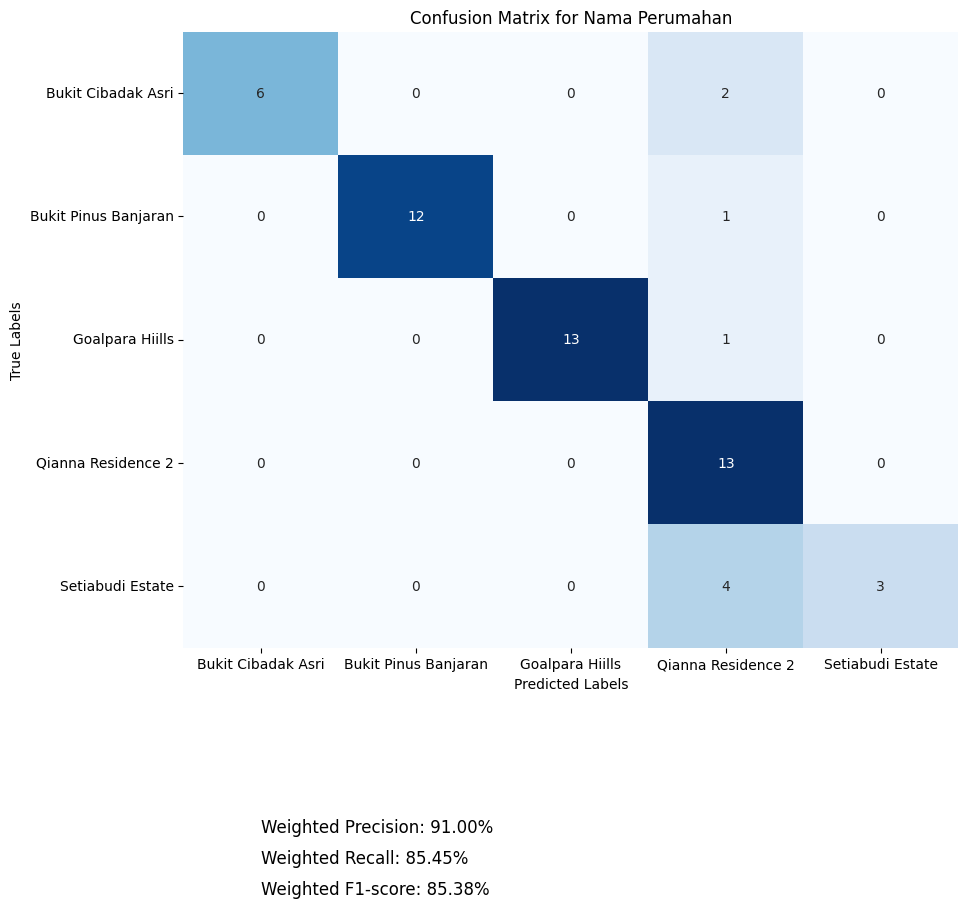

Output Jenis Rumah:
Weighted Precision for output Jenis Rumah: 94.67%
Weighted Recall for output Jenis Rumah: 94.55%
Weighted F1-score for output Jenis Rumah: 94.57%

Class: Komersil
  Precision: 90.48%
  Recall: 95.00%
  F1-score: 92.68%

Class: Subsidi
  Precision: 97.06%
  Recall: 94.29%
  F1-score: 95.65%



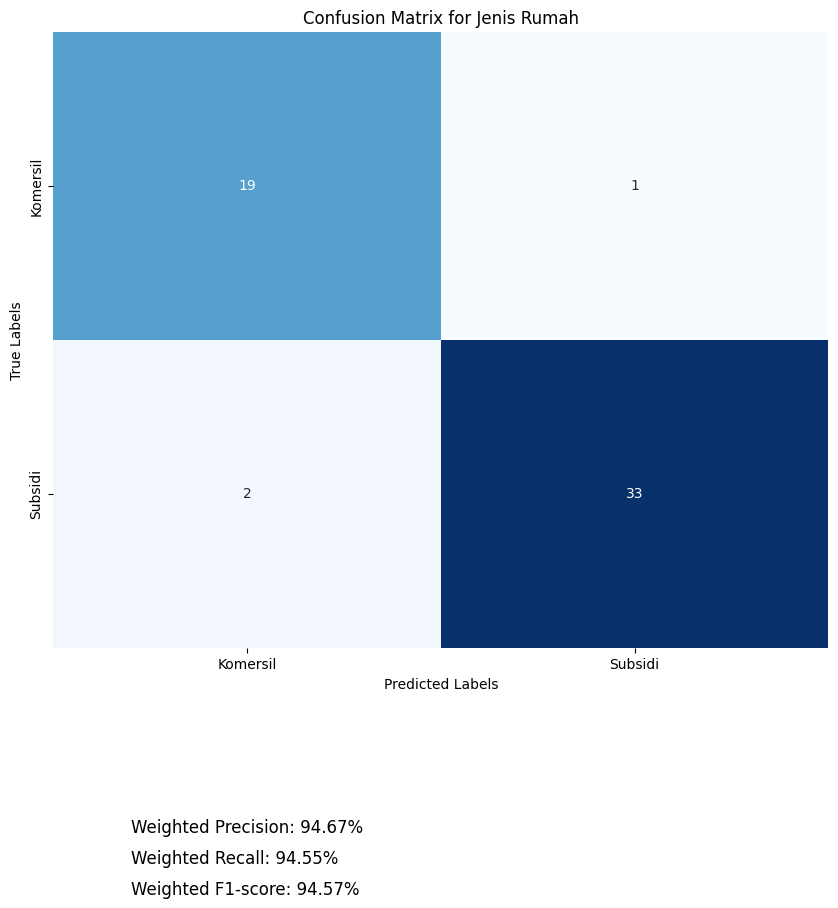

Output Tipe Rumah:
Weighted Precision for output Tipe Rumah: 85.45%
Weighted Recall for output Tipe Rumah: 85.45%
Weighted F1-score for output Tipe Rumah: 84.01%

Class: 30/60
  Precision: 86.67%
  Recall: 97.50%
  F1-score: 91.76%

Class: 36/72
  Precision: 77.78%
  Recall: 58.33%
  F1-score: 66.67%

Class: 45/84
  Precision: 100.00%
  Recall: 33.33%
  F1-score: 50.00%



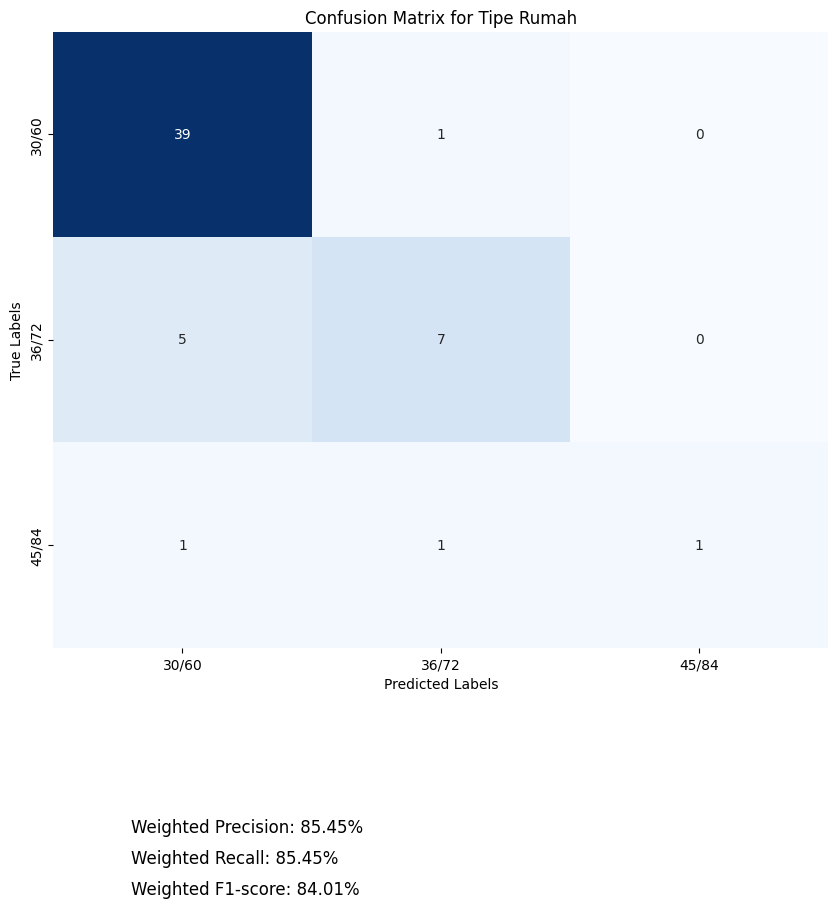

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Inisialisasi dictionary untuk nama kolom
column_predicted = {1: "Nama Perumahan", 2: "Jenis Rumah", 3: "Tipe Rumah"}

# Inisialisasi daftar untuk menyimpan metrik
precisions = []
recalls = []
f1_scores = []

for i in range(y_test.shape[1]):
    true_labels = y_test.iloc[:, i]
    predicted_labels = y_pred_test[:, i]
    
    # Menghitung confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    
    # Menghitung precision, recall, dan F1-score
    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    f1 = f1_score(true_labels, predicted_labels, average='weighted')

    # Menambahkan metrik ke daftar yang sesuai
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Print the confusion matrix and related metrics for the ith output
    print(f"Output {column_predicted[i+1]}:")
    # print(conf_matrix)
    print(f"Weighted Precision for output {column_predicted[i+1]}: {precision*100:.2f}%")
    print(f"Weighted Recall for output {column_predicted[i+1]}: {recall*100:.2f}%")
    print(f"Weighted F1-score for output {column_predicted[i+1]}: {f1*100:.2f}%")
    print()
    
    # Menghitung precision, recall, dan f1-score untuk setiap kelas
    report = classification_report(true_labels, predicted_labels, output_dict=True)
    
    # Extract the unique class names for the labels in the confusion matrix
    class_names = np.unique(true_labels)
    
    # Print precision, recall, and f1-score for each class
    for class_name in class_names:
        class_precision = report[str(class_name)]['precision'] * 100
        class_recall = report[str(class_name)]['recall'] * 100
        class_f1 = report[str(class_name)]['f1-score'] * 100
        print(f"Class: {class_name}")
        print(f"  Precision: {class_precision:.2f}%")
        print(f"  Recall: {class_recall:.2f}%")
        print(f"  F1-score: {class_f1:.2f}%")
        print()
    
    # Plotting the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {column_predicted[i+1]}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    
    # Adding the overall metrics as text annotations
    plt.text(0.1, -0.3, f'Weighted Precision: {precision*100:.2f}%', fontsize=12, transform=plt.gca().transAxes)
    plt.text(0.1, -0.35, f'Weighted Recall: {recall*100:.2f}%', fontsize=12, transform=plt.gca().transAxes)
    plt.text(0.1, -0.4, f'Weighted F1-score: {f1*100:.2f}%', fontsize=12, transform=plt.gca().transAxes)
    
    plt.show()

# Save the Model

In [51]:
import pickle

In [52]:
with open('../models/model.pkl', 'wb') as f:
    pickle.dump(model, f)

## Save the Encoder

In [53]:
with open('../models/status_pernikahan_encoder.pkl', 'wb') as f:
    pickle.dump(status_pernikahan_encoder, f)
    
with open('../models/pendapatan_bulan_encoder.pkl', 'wb') as f:
    pickle.dump(pendapatan_bulan_encoder, f)

with open('../models/usia_scaler.pkl', 'wb') as f:
    pickle.dump(usia_scaler, f)